In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [17]:
columns = ['potential', '20ppm','50ppm','80ppm','100ppm','150ppm','200ppm','250ppm']

In [19]:
df = pd.read_csv('eth0914.csv',header=None)
print(df.shape)
df.columns = columns
print(df)

(900, 8)
     potential  20ppm  50ppm  80ppm  100ppm  150ppm  200ppm  250ppm
0       -0.700 -5.611 -5.649 -5.654  -5.665  -5.683  -5.701  -5.711
1       -0.699 -5.619 -5.656 -5.662  -5.672  -5.690  -5.708  -5.718
2       -0.698 -5.626 -5.663 -5.669  -5.679  -5.696  -5.714  -5.724
3       -0.697 -5.633 -5.670 -5.675  -5.686  -5.702  -5.720  -5.730
4       -0.696 -5.639 -5.676 -5.681  -5.692  -5.708  -5.726  -5.735
..         ...    ...    ...    ...     ...     ...     ...     ...
895      0.195 -6.055 -6.023 -6.020  -6.028  -6.014  -6.017  -6.019
896      0.196 -6.054 -6.022 -6.019  -6.026  -6.012  -6.015  -6.017
897      0.197 -6.052 -6.020 -6.018  -6.025  -6.011  -6.013  -6.016
898      0.198 -6.051 -6.019 -6.016  -6.024  -6.010  -6.012  -6.014
899      0.199 -6.049 -6.018 -6.015  -6.022  -6.008  -6.010  -6.012

[900 rows x 8 columns]


In [20]:
c =1
for c in range(1,8):
    dt = df.iloc[:,c]
    id_  = dt.idxmin()
    v = -0.7 + 0.001*id_
    print(v)
    c +=1


-0.25599999999999995
-0.27699999999999997
-0.283
-0.2869999999999999
-0.29499999999999993
-0.30099999999999993
-0.30499999999999994


In [21]:
import random
i =1
c =1
k = []
for c in range(1,8):
    dt = df.iloc[:,c]
    for i in range(0,10000):
        a, b = random.sample(range(50,150),2)
        idmax_ = max(a,b)
        idmin_ = min(a,b)
        y1 = dt.iloc[idmax_,]
        y2 = dt.iloc[idmin_,]
        x1 = -0.7 + 0.001*idmax_
        x2 = -0.7 + 0.001*idmin_
        k1 = (y1-y2)/(x1-x2)
        k.append(k1)
        i +=1
    c+=1

In [22]:
print(len(k))
import numpy as np
mean_k = np.mean(k)
print(mean_k)

70000
-2.378433925100143


In [23]:
c = 1
I = []
I01 = []
for c in range(1,8):
    dt = df.iloc[:,c]
    b = []
    for i in range(0,10000):
        c = random.randint(50,150)
        y = dt.iloc[c,]
        x = -0.7 + 0.001*c
        b1 = y - mean_k*x
        b.append(b1)
        i +=1
    mean_b = np.mean(b)
    idx = dt.idxmin()
    e0 = -0.7 + 0.001*idx
    i0 = mean_k*e0 + mean_b
    #I0 = 10**(i0)*1000000
    #I01.append(I0)

    print(i0)
    I.append(i0)
    c +=1
    

-6.7254035982265705
-6.720703887012099
-6.72137343801376
-6.7259945076498076
-6.726458069338188
-6.730848549085396
-6.733396088263516


[-6.7254035982265705, -6.720703887012099, -6.72137343801376, -6.7259945076498076, -6.726458069338188, -6.730848549085396, -6.733396088263516]


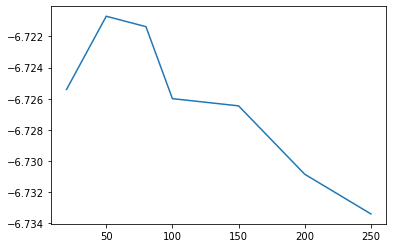

In [24]:
print(I)
#print(I01)
x=[20,50,80,100,150,200,250]
plt.plot(x,I)

In [11]:
idx = df['100ppm'].idxmin()
dt = df["100ppm"]
e0 = -0.7 + 0.001*idx
print(e0)
i0 = mean_k*e0 + mean_b
print(i0)

-0.31099999999999994
-6.827426636539663


In [25]:
import random
i =1
c =1
k = []
for c in range(1,8):
    dt = df.iloc[:,c]
    for i in range(0,10000):
        a, b = random.sample(range(660,740),2)
        idmax_ = max(a,b)
        idmin_ = min(a,b)
        y1 = dt.iloc[idmax_,]
        y2 = dt.iloc[idmin_,]
        x1 = -0.7 + 0.001*idmax_
        x2 = -0.7 + 0.001*idmin_
        k1 = (y1-y2)/(x1-x2)
        k.append(k1)
        i +=1
    c+=1

In [26]:
print(len(k))
import numpy as np
mean_k = np.mean(k)
print(mean_k)

70000
1.614061773603666


In [28]:
c = 1
I = []
for c in range(1,8):
    dt = df.iloc[:,c]
    b = []
    for i in range(0,10000):
        c = random.randint(660,740)
        y = dt.iloc[c,]
        x = -0.7 + 0.001*c
        b1 = y - mean_k*x
        b.append(b1)
        i +=1
    mean_b = np.mean(b)
    idx = dt.idxmin()
    e0 = -0.7 + 0.001*idx
    i0 = mean_k*e0 + mean_b

    print(i0)
    I.append(i0)
    c +=1

-6.768815782175384
-6.756164568295857
-6.751806696038101
-6.754423267149105
-6.746252075763058
-6.745540298815188
-6.743406606707341


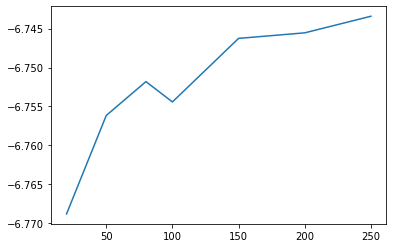

In [29]:
x=[20,50,80,100,150,200,250]
plt.plot(x,I)